**Logistic regression analysis with ADAM optimization for different learning rates, regularization types, and regularization parameters.**

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import martine.functions_martine as fun
import martine.NeuralNetwork as NN
import pandas as pd

from pathlib import Path
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from functions.make_dataset import *
from functions.nn_pytorch import *

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
from sklearn.preprocessing import LabelEncoder

import autograd.numpy as np
from functions.ffnn import *
from functions.activation_funcs import *
from functions.cost_functions import * 

In [2]:
np.random.seed(2018)
seed = 2018

In [3]:
path = '/Users/Martine Pedersen/Oppgaver/Project_3_FYSSTK/kagglehub/datasets/nikhil7280/weather-type-classification/versions/1/weather_classification_data.csv'
data = pd.read_csv(path)

K = 4 # number of classes

# Identify categorical columns
cat_cols = data.select_dtypes(include=["object"]).columns

# Create label encoders for each categorical column
encoders = {col: LabelEncoder() for col in cat_cols}

# Apply encoding
# String to numerical conversion
for col in cat_cols:
    data[col] = encoders[col].fit_transform(data[col]).astype(int)

X = data.drop('Weather Type', axis=1).values
y = data['Weather Type'].values

inputs = X
targets = np.zeros((len(y), K))
for i, t in enumerate(y):
    targets[i, t] = 1

**Own NN (Martine)**

In [4]:
# vary learning rate (no regularization)

netas = 4 #number of different learning rates
etas = np.logspace(-4, -1, netas)

# matrices for storing accuracy results
acc_train_matrix_no_reg = np.zeros([netas])
acc_test_matrix_no_reg = np.zeros([netas]) 

# split data into training and test data
X_train, X_test, t_train, t_test = train_test_split(inputs, targets, test_size=0.2, random_state=seed)

# scale data
#X_train, X_test = fun.scale_data(X_train, X_test, "classifier")
# Scale inputs only (standard for classifiers)
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define network architecture
network_input_size = X_train.shape[1]
layer_output_sizes1 = [K]

hidden_func = None
output_func = fun.Softmax()
cost_func = fun.CCE()

# set parameters
epochs = 20
M = 128
rho1, rho2 = 0.9, 0.999

# create model object
model = NN.NeuralNetwork(network_input_size, layer_output_sizes1, hidden_func, output_func, cost_func, seed = seed)

activation_funcs = model.activation_list()

# loop through learning rates
for i in range(netas):
    eta = etas[i]

    # set learning rate scheduler
    scheduler = fun.ADAM(eta, rho1, rho2)

    # create/reset layers
    layers = model.create_layers()

    # train network using only training data and stochastic gradient descent
    updated_layers = model.train_network_SGD(X_train, layers, activation_funcs, t_train, scheduler, epochs, M)

    # evaluate model on training and test data
    train_metrics = model.evaluate(X_train, updated_layers, activation_funcs, t_train)
    test_metrics = model.evaluate(X_test, updated_layers, activation_funcs, t_test)
        
    # calculate accuracy score
    acc_train_matrix_no_reg[i] = train_metrics["accuracy"] #fill in accuracy for training data
    acc_test_matrix_no_reg[i] = test_metrics["accuracy"] #fill in accuracy for test data

ADAM: Learning rate = 0.0001, Regularization parameter = 0.0
ADAM: Learning rate = 0.001, Regularization parameter = 0.0
ADAM: Learning rate = 0.01, Regularization parameter = 0.0
ADAM: Learning rate = 0.1, Regularization parameter = 0.0


In [5]:
# vary regularization parameter and learning rate (L2 regularization)

nlambdas = 4 #number of different regularization parameters
lambdas = np.logspace(-6, -3, nlambdas)

netas = 4 #number of different learning rates
etas = np.logspace(-4, -1, netas)

# matrices for storing accuracy results
acc_train_matrix_L2 = np.zeros([netas,nlambdas])
acc_test_matrix_L2 = np.zeros([netas,nlambdas]) 

# split data into training and test data
X_train, X_test, t_train, t_test = train_test_split(inputs, targets, test_size=0.2, random_state=seed)

# scale data
#X_train, X_test = fun.scale_data(X_train, X_test, "classifier")
# Scale inputs only (standard for classifiers)
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define network architecture
network_input_size = X_train.shape[1]
layer_output_sizes1 = [K]

hidden_func = None
output_func = fun.Softmax()
cost_func = fun.CCEL2()

# set parameters
epochs = 20
M = 128
rho1, rho2 = 0.9, 0.999

# create model object
model = NN.NeuralNetwork(network_input_size, layer_output_sizes1, hidden_func, output_func, cost_func, seed = seed)

activation_funcs = model.activation_list()

# loop through learning rates and regularization parameters
for i in range(netas):
    for j in range(nlambdas):
        
        lmb = lambdas[j]
        eta = etas[i]

        # set learning rate scheduler
        scheduler = fun.ADAM(eta, rho1, rho2)

        # create/reset layers
        layers = model.create_layers()

        # train network using only training data and stochastic gradient descent
        updated_layers = model.train_network_SGD(X_train, layers, activation_funcs, t_train, scheduler, epochs, M, lmb)

        # evaluate model on training and test data
        train_metrics = model.evaluate(X_train, updated_layers, activation_funcs, t_train)
        test_metrics = model.evaluate(X_test, updated_layers, activation_funcs, t_test)
        
        # calculate accuracy score
        acc_train_matrix_L2[i,j] = train_metrics["accuracy"] #fill in accuracy for training data
        acc_test_matrix_L2[i,j] = test_metrics["accuracy"] #fill in accuracy for test data


ADAM: Learning rate = 0.0001, Regularization parameter = 1e-06
ADAM: Learning rate = 0.0001, Regularization parameter = 1e-05
ADAM: Learning rate = 0.0001, Regularization parameter = 0.0001
ADAM: Learning rate = 0.0001, Regularization parameter = 0.001
ADAM: Learning rate = 0.001, Regularization parameter = 1e-06
ADAM: Learning rate = 0.001, Regularization parameter = 1e-05
ADAM: Learning rate = 0.001, Regularization parameter = 0.0001
ADAM: Learning rate = 0.001, Regularization parameter = 0.001
ADAM: Learning rate = 0.01, Regularization parameter = 1e-06
ADAM: Learning rate = 0.01, Regularization parameter = 1e-05
ADAM: Learning rate = 0.01, Regularization parameter = 0.0001
ADAM: Learning rate = 0.01, Regularization parameter = 0.001
ADAM: Learning rate = 0.1, Regularization parameter = 1e-06
ADAM: Learning rate = 0.1, Regularization parameter = 1e-05
ADAM: Learning rate = 0.1, Regularization parameter = 0.0001
ADAM: Learning rate = 0.1, Regularization parameter = 0.001


In [6]:
# vary regularization parameter and learning rate (L1 regularization)

nlambdas = 4 #number of different regularization parameters
lambdas = np.logspace(-6, -3, nlambdas)

netas = 4 #number of different learning rates
etas = np.logspace(-4, -1, netas)

# matrices for storing accuracy results
acc_train_matrix_L1 = np.zeros([netas,nlambdas])
acc_test_matrix_L1 = np.zeros([netas,nlambdas]) 

# split data into training and test data
X_train, X_test, t_train, t_test = train_test_split(inputs, targets, test_size=0.2, random_state=seed)

# scale data
#X_train, X_test = fun.scale_data(X_train, X_test, "classifier")
# Scale inputs only (standard for classifiers)
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define network architecture
network_input_size = X_train.shape[1]
layer_output_sizes1 = [K]

hidden_func = None
output_func = fun.Softmax()
cost_func = fun.CCEL1()

# set parameters
epochs = 20
M = 128
rho1, rho2 = 0.9, 0.999

# create model object
model = NN.NeuralNetwork(network_input_size, layer_output_sizes1, hidden_func, output_func, cost_func, seed = seed)

activation_funcs = model.activation_list()

# loop through learning rates and regularization parameters
for i in range(netas):
    for j in range(nlambdas):
        
        lmb = lambdas[j]
        eta = etas[i]

        # set learning rate scheduler
        scheduler = fun.ADAM(eta, rho1, rho2)

        # create/reset layers
        layers = model.create_layers()

        # train network using only training data and stochastic gradient descent
        updated_layers = model.train_network_SGD(X_train, layers, activation_funcs, t_train, scheduler, epochs, M, lmb)

        # evaluate model on training and test data
        train_metrics = model.evaluate(X_train, updated_layers, activation_funcs, t_train)
        test_metrics = model.evaluate(X_test, updated_layers, activation_funcs, t_test)
        
        # calculate accuracy score
        acc_train_matrix_L1[i,j] = train_metrics["accuracy"] #fill in accuracy for training data
        acc_test_matrix_L1[i,j] = test_metrics["accuracy"] #fill in accuracy for test data


ADAM: Learning rate = 0.0001, Regularization parameter = 1e-06
ADAM: Learning rate = 0.0001, Regularization parameter = 1e-05
ADAM: Learning rate = 0.0001, Regularization parameter = 0.0001
ADAM: Learning rate = 0.0001, Regularization parameter = 0.001
ADAM: Learning rate = 0.001, Regularization parameter = 1e-06
ADAM: Learning rate = 0.001, Regularization parameter = 1e-05
ADAM: Learning rate = 0.001, Regularization parameter = 0.0001
ADAM: Learning rate = 0.001, Regularization parameter = 0.001
ADAM: Learning rate = 0.01, Regularization parameter = 1e-06
ADAM: Learning rate = 0.01, Regularization parameter = 1e-05
ADAM: Learning rate = 0.01, Regularization parameter = 0.0001
ADAM: Learning rate = 0.01, Regularization parameter = 0.001
ADAM: Learning rate = 0.1, Regularization parameter = 1e-06
ADAM: Learning rate = 0.1, Regularization parameter = 1e-05
ADAM: Learning rate = 0.1, Regularization parameter = 0.0001
ADAM: Learning rate = 0.1, Regularization parameter = 0.001


C:\Users\Martine Pedersen\AppData\Local\Temp\ipykernel_18444\1895987452.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


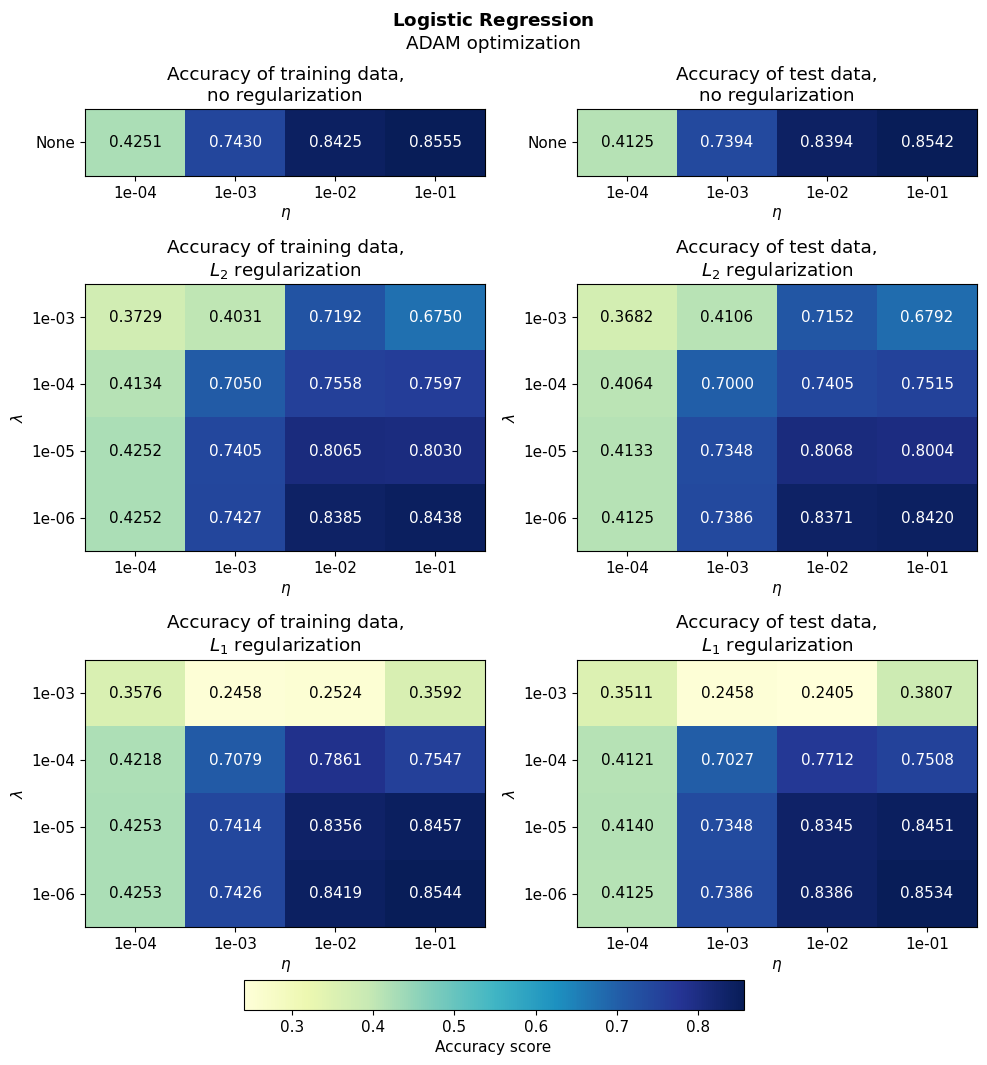

In [7]:
# plot results

plt.rcParams.update({"font.size": 11})

fig, axes = plt.subplots(3, 2, figsize=(10, 10), height_ratios=[0.25, 1, 1])
axes = axes.flatten()  

# Combine all accuracy values into one array
all_acc_values = np.concatenate([
    acc_train_matrix_no_reg.flatten(),
    acc_test_matrix_no_reg.flatten(),
    acc_train_matrix_L2.flatten(),
    acc_test_matrix_L2.flatten(),
    acc_train_matrix_L1.flatten(),
    acc_test_matrix_L1.flatten()
])


# Set colorbar limits
vmin = np.min(all_acc_values) # min value
vmax = np.max(all_acc_values) # max value
mid = (vmin + vmax)/2

# Titles for each subplot
titles = ["Accuracy of training data,\nno regularization", "Accuracy of test data,\nno regularization", 
          "Accuracy of training data,\n"+r"$L_2$ regularization", "Accuracy of test data,\n"+r"$L_2$ regularization",
          "Accuracy of training data,\n"+r"$L_1$ regularization", "Accuracy of test data,\n"+r"$L_1$ regularization"]

# Corresponding matrices  (transpose regularized matrices as they are shape (netas, nlambdas))
matrices = [acc_train_matrix_no_reg[np.newaxis,:], acc_test_matrix_no_reg[np.newaxis,:], acc_train_matrix_L2.T, acc_test_matrix_L2.T, acc_train_matrix_L1.T, acc_test_matrix_L1.T]

# Plot all heatmaps
for i, ax in enumerate(axes):
    #im = ax.imshow(matrices[i], aspect='auto', origin='lower', cmap='summer_r', vmin=vmin, vmax=vmax)
    im = ax.imshow(matrices[i], aspect='auto', origin='lower', cmap='YlGnBu', vmin=vmin, vmax=vmax)
    ax.set_title(titles[i])

    # Set x-ticks
    ax.set_xticks(range(len(etas)))
    ax.set_xticklabels([f"{y:.0e}" for y in etas])
    ax.set_xlabel(r"$\eta$")

    # Set y-ticks
    if matrices[i].shape[0] == 1:  # no regularization (single row)
        ax.set_yticks([0])
        ax.set_yticklabels(["None"])
    else:
        ax.set_yticks(range(len(lambdas)))
        ax.set_yticklabels([f"{x:.0e}" for x in lambdas])
        ax.set_ylabel(r"$\lambda$")

    # Add text annotations
    for r in range(matrices[i].shape[0]):
        for c in range(matrices[i].shape[1]):
            value = matrices[i][r, c]
            color = "white" if value > mid else "black"
            ax.text(c, r, f"{matrices[i][r, c]:.4f}", ha="center", va="center", color=color, fontsize=11)

# Shared colorbar
cbar = fig.colorbar(im, ax=ax, orientation="horizontal", cax=fig.add_axes([0.25, -0.02, 0.5, 0.03]))
cbar.set_label("Accuracy score")

plt.suptitle(r"$\bf{Logistic\ Regression}$"+"\nADAM optimization")
fig.tight_layout()
#plt.savefig("Logistic_reg.png", bbox_inches="tight")
plt.show()


**Own NN (Kjersti & Sverre)**

In [8]:
def accuracy(model, X, t):
    """
    Compute accuracy score
    """
    predictions = model._feed_forward(X)
    pred_class = np.argmax(predictions, axis=1)
    true_class = np.argmax(t, axis=1)
    return np.mean(pred_class == true_class)

In [9]:
# vary learning rate (no regularization)

netas = 4 #number of different learning rates
etas = np.logspace(-4, -1, netas)

# matrices for storing accuracy results
acc_train_matrix_no_reg = np.zeros([netas])
acc_test_matrix_no_reg = np.zeros([netas]) 

# split data into training and test data
X_train, X_test, t_train, t_test = train_test_split(inputs, targets, test_size=0.2, random_state=seed)

# scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define network architecture
input_size = X_train.shape[1]
output_size = t_train.shape[1]
layer_sizes = [output_size]
activation_funcs = [softmax]
activation_ders = [derivate(softmax)]

# set parameters
epochs = 20
M = 128

# loop through learning rates
for i in range(netas):
    eta = etas[i]

    # Create a new network
    nn = NeuralNetwork(
        network_input_size=input_size,
        layer_output_sizes=layer_sizes,
        activation_funcs=activation_funcs,
        activation_ders=activation_ders,
        cost_fun=cross_entropy,
        cost_der=cross_entropy_der
    )

    # Train model using SGD and ADAM optimizer
    nn.train_SGD(
        X_train,
        t_train,
        epochs=epochs,
        learning_rate=eta,
        batch_size=M,
        optimizer="Adam"
    )

    # evaluate model on training and test data
    acc_train_matrix_no_reg[i] = accuracy(nn, X_train, t_train)
    acc_test_matrix_no_reg[i] = accuracy(nn, X_test, t_test)


In [10]:
# vary regularization parameter and learning rate (L2 regularization)

nlambdas = 4 #number of different regularization parameters
lambdas = np.logspace(-6, -3, nlambdas)

netas = 4 #number of different learning rates
etas = np.logspace(-4, -1, netas)

# matrices for storing accuracy results
acc_train_matrix_L2 = np.zeros([netas,nlambdas])
acc_test_matrix_L2 = np.zeros([netas,nlambdas]) 

# split data into training and test data
X_train, X_test, t_train, t_test = train_test_split(inputs, targets, test_size=0.2, random_state=seed)

# scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define network architecture
input_size = X_train.shape[1]
output_size = t_train.shape[1]
layer_sizes = [output_size]
activation_funcs = [softmax]
activation_ders = [derivate(softmax)]

# set parameters
epochs = 20
M = 128

# loop through learning rates and regularization parameters
for i in range(netas):
    eta = etas[i]
    for j in range(nlambdas):
        lmb = lambdas[j]

        # Create a new network
        nn = NeuralNetwork(
            network_input_size = input_size,
            layer_output_sizes = layer_sizes,
            activation_funcs = activation_funcs,
            activation_ders = activation_ders,
            cost_fun = cross_entropy,
            cost_der = cross_entropy_der,
            lamb = lmb,
            cost_fun_type = "L2"
        )

        # Train model using SGD and ADAM optimizer
        nn.train_SGD(
            X_train,
            t_train,
            epochs = epochs,
            learning_rate = eta,
            batch_size = M,
            optimizer = "Adam"
        )

        # evaluate model on training and test data
        acc_train_matrix_L2[i, j] = accuracy(nn, X_train, t_train)
        acc_test_matrix_L2[i, j]  = accuracy(nn, X_test,  t_test)


In [11]:
# vary regularization parameter and learning rate (L1 regularization)

nlambdas = 4 #number of different regularization parameters
lambdas = np.logspace(-6, -3, nlambdas)

netas = 4 #number of different learning rates
etas = np.logspace(-4, -1, netas)

# matrices for storing accuracy results
acc_train_matrix_L1 = np.zeros([netas,nlambdas])
acc_test_matrix_L1 = np.zeros([netas,nlambdas]) 

# split data into training and test data
X_train, X_test, t_train, t_test = train_test_split(inputs, targets, test_size=0.2, random_state=seed)

# scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define network architecture
input_size = X_train.shape[1]
output_size = t_train.shape[1]
layer_sizes = [output_size]
activation_funcs = [softmax]
activation_ders = [derivate(softmax)]

# set parameters
epochs = 20
M = 128
rho1, rho2 = 0.9, 0.999

# loop through learning rates and regularization parameters
for i in range(netas):
    eta = etas[i]
    for j in range(nlambdas):
        lmb = lambdas[j]

        # Create a new network
        nn = NeuralNetwork(
            network_input_size = input_size,
            layer_output_sizes = layer_sizes,
            activation_funcs = activation_funcs,
            activation_ders = activation_ders,
            cost_fun = cross_entropy,
            cost_der = cross_entropy_der,
            lamb = lmb,
            cost_fun_type = "L1"
        )

        # Train model using SGD and ADAM optimizer
        nn.train_SGD(
            X_train,
            t_train,
            epochs = epochs,
            learning_rate = eta,
            batch_size = M,
            optimizer = "Adam"
        )

        # evaluate model on training and test data
        acc_train_matrix_L1[i, j] = accuracy(nn, X_train, t_train)
        acc_test_matrix_L1[i, j]  = accuracy(nn, X_test,  t_test)

C:\Users\Martine Pedersen\AppData\Local\Temp\ipykernel_18444\1895987452.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


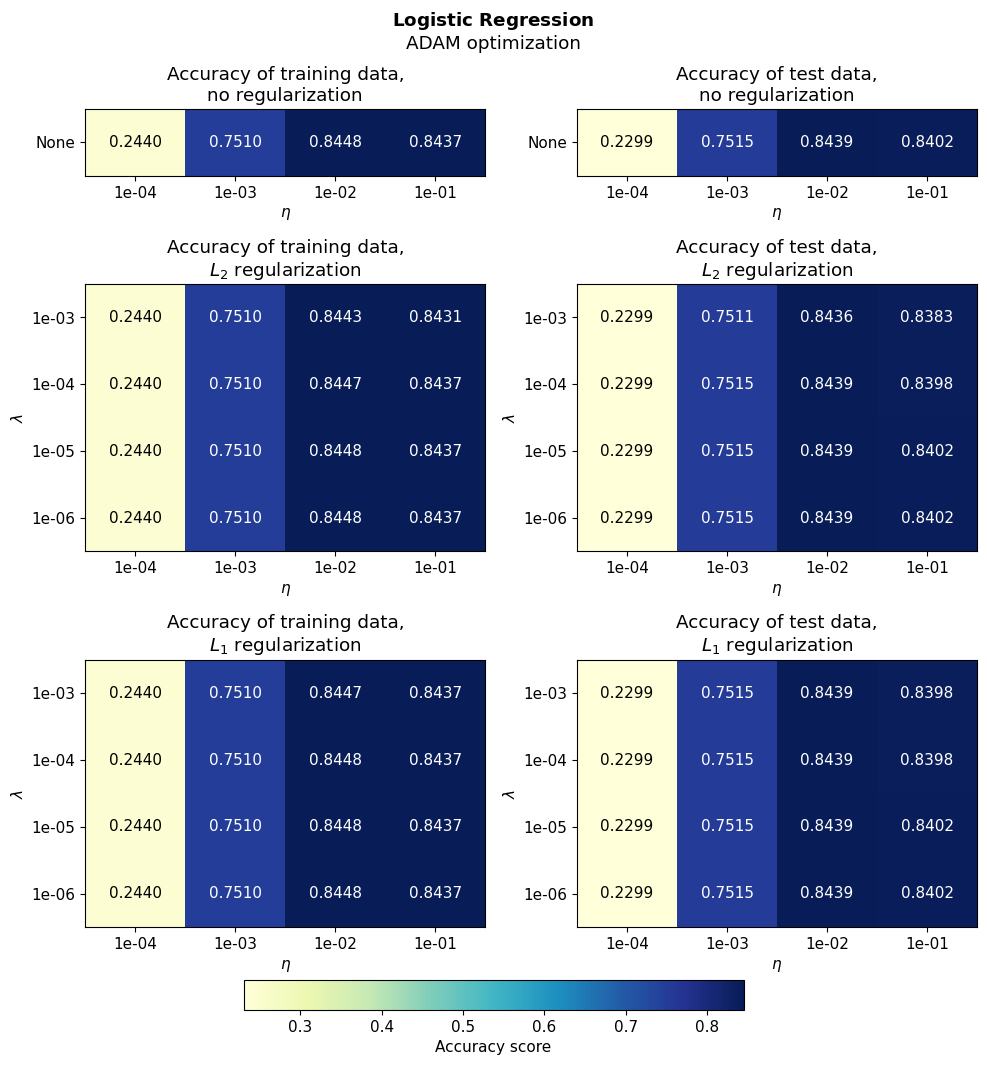

In [12]:
# plot results

plt.rcParams.update({"font.size": 11})

fig, axes = plt.subplots(3, 2, figsize=(10, 10), height_ratios=[0.25, 1, 1])
axes = axes.flatten()  

# Combine all accuracy values into one array
all_acc_values = np.concatenate([
    acc_train_matrix_no_reg.flatten(),
    acc_test_matrix_no_reg.flatten(),
    acc_train_matrix_L2.flatten(),
    acc_test_matrix_L2.flatten(),
    acc_train_matrix_L1.flatten(),
    acc_test_matrix_L1.flatten()
])


# Set colorbar limits
vmin = np.min(all_acc_values) # min value
vmax = np.max(all_acc_values) # max value
mid = (vmin + vmax)/2

# Titles for each subplot
titles = ["Accuracy of training data,\nno regularization", "Accuracy of test data,\nno regularization", 
          "Accuracy of training data,\n"+r"$L_2$ regularization", "Accuracy of test data,\n"+r"$L_2$ regularization",
          "Accuracy of training data,\n"+r"$L_1$ regularization", "Accuracy of test data,\n"+r"$L_1$ regularization"]

# Corresponding matrices  (transpose regularized matrices as they are shape (netas, nlambdas))
matrices = [acc_train_matrix_no_reg[np.newaxis,:], acc_test_matrix_no_reg[np.newaxis,:], acc_train_matrix_L2.T, acc_test_matrix_L2.T, acc_train_matrix_L1.T, acc_test_matrix_L1.T]

# Plot all heatmaps
for i, ax in enumerate(axes):
    #im = ax.imshow(matrices[i], aspect='auto', origin='lower', cmap='summer_r', vmin=vmin, vmax=vmax)
    im = ax.imshow(matrices[i], aspect='auto', origin='lower', cmap='YlGnBu', vmin=vmin, vmax=vmax)
    ax.set_title(titles[i])

    # Set x-ticks
    ax.set_xticks(range(len(etas)))
    ax.set_xticklabels([f"{y:.0e}" for y in etas])
    ax.set_xlabel(r"$\eta$")

    # Set y-ticks
    if matrices[i].shape[0] == 1:  # no regularization (single row)
        ax.set_yticks([0])
        ax.set_yticklabels(["None"])
    else:
        ax.set_yticks(range(len(lambdas)))
        ax.set_yticklabels([f"{x:.0e}" for x in lambdas])
        ax.set_ylabel(r"$\lambda$")

    # Add text annotations
    for r in range(matrices[i].shape[0]):
        for c in range(matrices[i].shape[1]):
            value = matrices[i][r, c]
            color = "white" if value > mid else "black"
            ax.text(c, r, f"{matrices[i][r, c]:.4f}", ha="center", va="center", color=color, fontsize=11)

# Shared colorbar
cbar = fig.colorbar(im, ax=ax, orientation="horizontal", cax=fig.add_axes([0.25, -0.02, 0.5, 0.03]))
cbar.set_label("Accuracy score")

plt.suptitle(r"$\bf{Logistic\ Regression}$"+"\nADAM optimization")
fig.tight_layout()
#plt.savefig("Logistic_reg.png", bbox_inches="tight")
plt.show()


**Pytorch**

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from typing import List

class WeatherNN(nn.Module):
    def __init__(
        self,
        input_dim: int,
        output_dim: int,
        hidden_dim: int = None,
        num_hidden_layers: int = None,
        activation: str = None
    ):  
        
        super().__init__()
        

        self.cost = nn.CrossEntropyLoss()
        #self.output_layer = nn.Softmax()
        
        if num_hidden_layers:
            # Choose activation function
            activations = {
                "relu": nn.ReLU(),
                "lrelu": nn.LeakyReLU(),
                "sigmoid": nn.Sigmoid(),
                "tanh": nn.Tanh(),
                "elu": nn.ELU()
            }
            act = activations[activation.lower()]

            layers = []

            # Input layer
            layers.append(nn.Linear(input_dim, hidden_dim))
            layers.append(act)
        
            # Hidden layers
            for h in range(num_hidden_layers - 1):
                layers.append(nn.Linear(hidden_dim, hidden_dim))
                layers.append(act)

            # Output layer
            layers.append(nn.Linear(hidden_dim, output_dim))
            #layers.append(nn.Softmax(dim=1))

        
        else:
            layers = []
            # Input layer
            layers.append(nn.Linear(input_dim, output_dim))

        self.model = nn.Sequential(*layers)
    
    def get_model(self):
        return self.model
    
    def forward(self, x):
        return self.model(x)
    
    def train_model(self, train_loader, lr: float, epochs: int, lmb: float=None, reg_type: str = None):
        """
        reg_type: None, "L1", or "L2"
        """
        self.train()
        optimizer = optim.Adam(self.parameters(), lr=lr)

        for e in range(epochs):
            for X, y in train_loader:
                optimizer.zero_grad()
                outputs = self.forward(X)
                loss = self.cost(outputs, y)

                if reg_type == "L1":
                    L1_norm = sum(p.abs().sum() for p in model.parameters())
                    loss += lmb * L1_norm

                if reg_type == "L2":
                    L2_norm = sum(p.pow(2).sum() for p in model.parameters())
                    loss += lmb * L2_norm
                    
                loss.backward()
                optimizer.step()
    
    def evaluate(self, loader):
        self.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for X, y in loader:
                outputs=self.forward(X) 
                preds = outputs.argmax(dim=1) 
                correct += (preds == y).sum().item()
                total += y.size(0)

        return correct / total


        

In [14]:
path = '/Users/Martine Pedersen/Oppgaver/Project_3_FYSSTK/kagglehub/datasets/nikhil7280/weather-type-classification/versions/1/weather_classification_data.csv'
dataset = WeatherDataset(csv_file=path)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
    
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [15]:
"""
from torch.utils.data import DataLoader, TensorDataset

X_train, X_test, t_train, t_test = train_test_split(inputs, targets, test_size=0.2, random_state=seed)

train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(t_train))
test_dataset = TensorDataset(torch.tensor(X_test), torch.tensor(t_test))

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
"""

'\nfrom torch.utils.data import DataLoader, TensorDataset\n\nX_train, X_test, t_train, t_test = train_test_split(inputs, targets, test_size=0.2, random_state=seed)\n\ntrain_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(t_train))\ntest_dataset = TensorDataset(torch.tensor(X_test), torch.tensor(t_test))\n\ntrain_loader = DataLoader(train_dataset, batch_size=128, shuffle=False)\ntest_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)\n'

In [16]:
# vary learning rate (no regularization)

# create loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=128, shuffle=False)

netas = 4 #number of different learning rates
etas = np.logspace(-4, -1, netas)

# matrices for storing accuracy results
acc_train_matrix_no_reg = np.zeros([netas])
acc_test_matrix_no_reg = np.zeros([netas]) 

# Set parameters
epochs = 20

# Define network dimensions
sample, label = next(iter(train_loader))
input_dim = sample.shape[1]
output_dim = len(torch.unique(label))


# loop through learning rates
for i in range(netas):
    eta = etas[i]

    np.random.seed(seed)
    torch.manual_seed(seed)
    
    # Create a new network
    model = WeatherNN(input_dim, output_dim)

    # Train model
    model.train_model(train_loader, lr=eta, epochs=epochs)

    # evaluate model on testing and training data
    acc_train_matrix_no_reg[i] = model.evaluate(train_loader)
    acc_test_matrix_no_reg[i]  = model.evaluate(test_loader)


In [17]:
# vary regularization parameter and learning rate (L2 regularization)

# create loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=128, shuffle=False)

nlambdas = 4 #number of different regularization parameters
lambdas = np.logspace(-6, -3, nlambdas)

netas = 4 #number of different learning rates
etas = np.logspace(-4, -1, netas)

# matrices for storing accuracy results
acc_train_matrix_L2 = np.zeros([netas,nlambdas])
acc_test_matrix_L2 = np.zeros([netas,nlambdas]) 

# Set parameters
epochs = 20

# Define network dimensions
sample, label = next(iter(train_loader))
input_dim = sample.shape[1]
output_dim = len(torch.unique(label))


# loop through learning rates and regularization parameters
for i in range(netas):
    eta = etas[i]
    for j in range(nlambdas):
        lmb = lambdas[j]

        np.random.seed(seed)
        torch.manual_seed(seed)
        
        # Create new network
        model = WeatherNN(input_dim, output_dim)

        # Train model
        model.train_model(train_loader,
                    lr=eta,
                    epochs=epochs,
                    lmb = lmb,
                    reg_type = "L2")

        # evaluate model on training and test data
        acc_train_matrix_L2[i, j] = model.evaluate(train_loader)
        acc_test_matrix_L2[i, j]  = model.evaluate(test_loader)

In [18]:
# vary regularization parameter and learning rate (L1 regularization)

# create loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=128, shuffle=False)

nlambdas = 4 #number of different regularization parameters
lambdas = np.logspace(-6, -3, nlambdas)

netas = 4 #number of different learning rates
etas = np.logspace(-4, -1, netas)

# matrices for storing accuracy results
acc_train_matrix_L1 = np.zeros([netas,nlambdas])
acc_test_matrix_L1 = np.zeros([netas,nlambdas]) 

# Set parameters
epochs = 20

# Define network dimensions
sample, label = next(iter(train_loader))
input_dim = sample.shape[1]
output_dim = len(torch.unique(label))


# loop through learning rates and regularization parameters
for i in range(netas):
    eta = etas[i]
    for j in range(nlambdas):
        lmb = lambdas[j]

        np.random.seed(seed)
        torch.manual_seed(seed)
        
        # Create new network
        model = WeatherNN(input_dim, output_dim)

        # Train model
        model.train_model(train_loader,
                    lr=eta,
                    epochs=epochs,
                    lmb = lmb,
                    reg_type = "L1")

        # evaluate model on training and test data
        acc_train_matrix_L1[i, j] = model.evaluate(train_loader)
        acc_test_matrix_L1[i, j]  = model.evaluate(test_loader)

C:\Users\Martine Pedersen\AppData\Local\Temp\ipykernel_18444\229536260.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


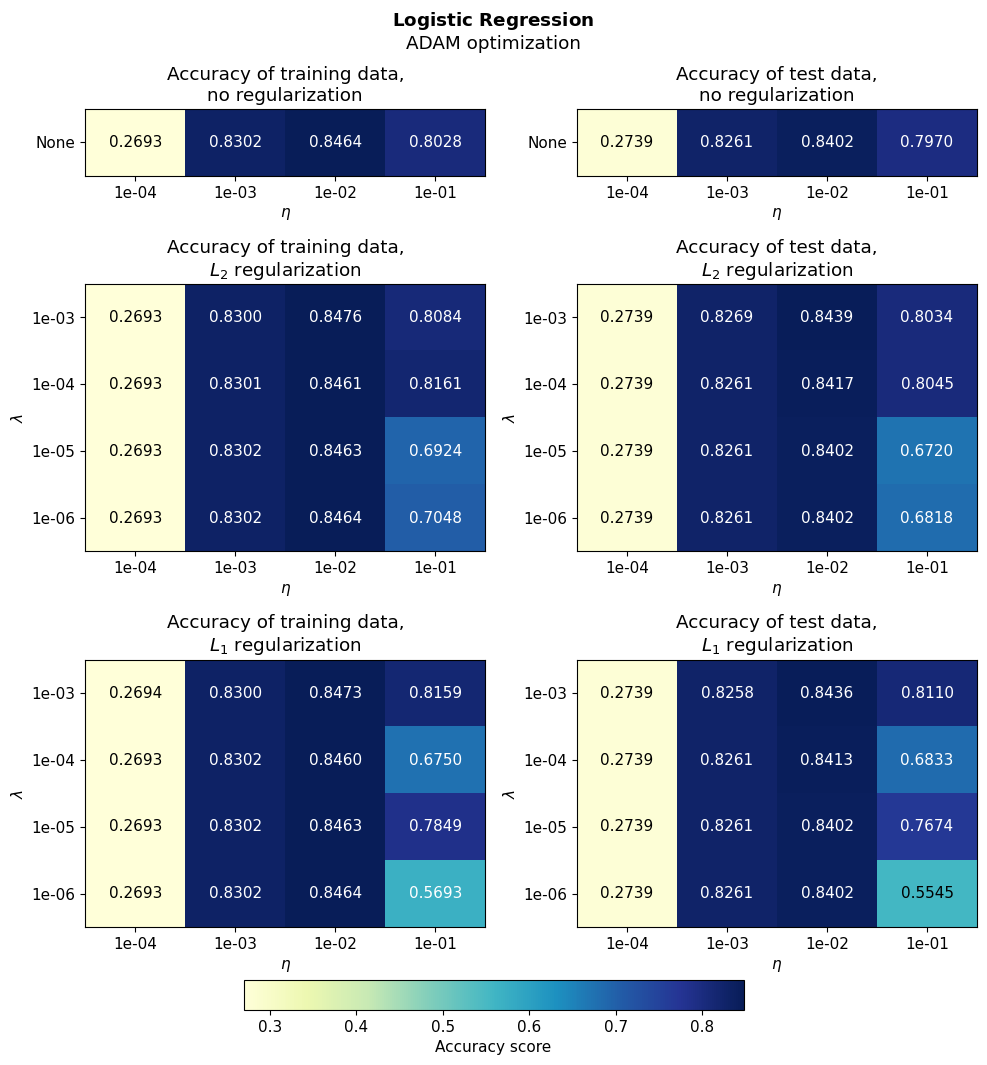

In [19]:
# plot results

plt.rcParams.update({"font.size": 11})

fig, axes = plt.subplots(3, 2, figsize=(10, 10), height_ratios=[0.25, 1, 1])
axes = axes.flatten()  

# Combine all accuracy values into one array
all_acc_values = np.concatenate([
    acc_train_matrix_no_reg.flatten(),
    acc_test_matrix_no_reg.flatten(),
    acc_train_matrix_L2.flatten(),
    acc_test_matrix_L2.flatten(),
    acc_train_matrix_L1.flatten(),
    acc_test_matrix_L1.flatten()
])


# Set colorbar limits
vmin = np.min(all_acc_values) # min value
vmax = np.max(all_acc_values) # max value
mid = (vmin + vmax)/2

# Titles for each subplot
titles = ["Accuracy of training data,\nno regularization", "Accuracy of test data,\nno regularization", 
          "Accuracy of training data,\n"+r"$L_2$ regularization", "Accuracy of test data,\n"+r"$L_2$ regularization",
          "Accuracy of training data,\n"+r"$L_1$ regularization", "Accuracy of test data,\n"+r"$L_1$ regularization"]

# Corresponding matrices  (transpose regularized matrices as they are shape (netas, nlambdas))
matrices = [acc_train_matrix_no_reg[np.newaxis,:], acc_test_matrix_no_reg[np.newaxis,:], acc_train_matrix_L2.T, acc_test_matrix_L2.T, acc_train_matrix_L1.T, acc_test_matrix_L1.T]

# Plot all heatmaps
for i, ax in enumerate(axes):
    #im = ax.imshow(matrices[i], aspect='auto', origin='lower', cmap='summer_r', vmin=vmin, vmax=vmax)
    im = ax.imshow(matrices[i], aspect='auto', origin='lower', cmap='YlGnBu', vmin=vmin, vmax=vmax)
    ax.set_title(titles[i])

    # Set x-ticks
    ax.set_xticks(range(len(etas)))
    ax.set_xticklabels([f"{y:.0e}" for y in etas])
    ax.set_xlabel(r"$\eta$")

    # Set y-ticks
    if matrices[i].shape[0] == 1:  # no regularization (single row)
        ax.set_yticks([0])
        ax.set_yticklabels(["None"])
    else:
        ax.set_yticks(range(len(lambdas)))
        ax.set_yticklabels([f"{x:.0e}" for x in lambdas])
        ax.set_ylabel(r"$\lambda$")

    # Add text annotations
    for r in range(matrices[i].shape[0]):
        for c in range(matrices[i].shape[1]):
            value = matrices[i][r, c]
            color = "white" if value > mid else "black"
            ax.text(c, r, f"{matrices[i][r, c]:.4f}", ha="center", va="center", color=color, fontsize=11)


# Shared colorbar
cbar = fig.colorbar(im, ax=ax, orientation="horizontal", cax=fig.add_axes([0.25, -0.02, 0.5, 0.03]))
cbar.set_label("Accuracy score")

plt.suptitle(r"$\bf{Logistic\ Regression}$"+"\nADAM optimization")
fig.tight_layout()
#plt.savefig("Logistic_reg.png", bbox_inches="tight")
plt.show()
